# Feature Analysis

In [14]:
import pandas as pd
import csv
from datetime import datetime, timedelta
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns

In [16]:
df_2class = pd.read_csv("data/df_2class_wNF.csv")

In [3]:
df_2class["issuedate"] = pd.to_datetime(df_2class["issuedate"]).dt.date

In [4]:
df = pd.read_csv("data/basicbib.tab",  sep='\t') # main dataframe with all the patents

C:\Users\DIEGO UNZUETA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
cols = np.asarray(df_424.columns)
cols[22] = "count_by_assignee_class"

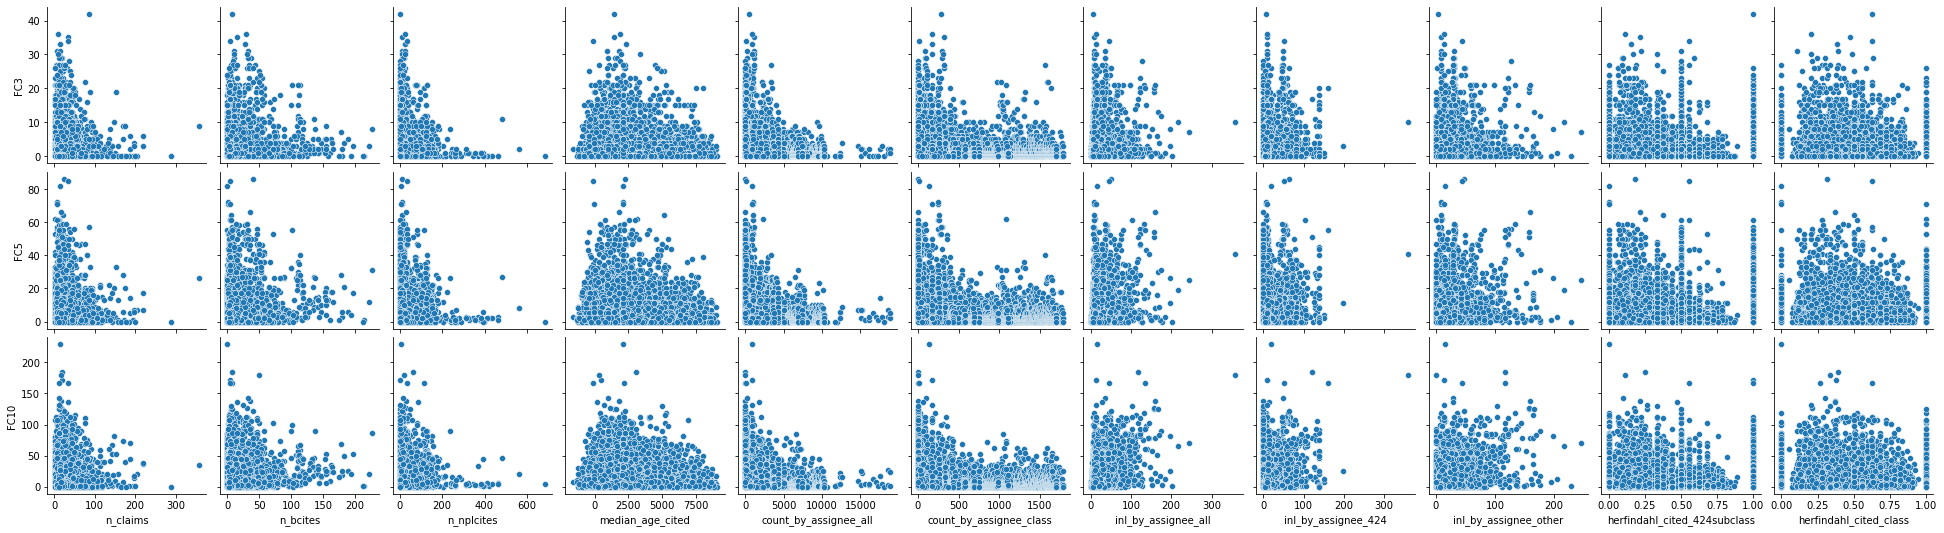

In [8]:
l = ["n_claims", "n_bcites", "n_nplcites", "median_age_cited",\
                               "count_by_assignee_all","count_by_assignee_class",\
                               "inl_by_assignee_all", "inl_by_assignee_424", "inl_by_assignee_other",\
                               "herfindahl_cited_424subclass", "herfindahl_cited_class"]

sns.pairplot(df_2class, y_vars = ["FC3", "FC5", "FC10"], \
                     x_vars = l)

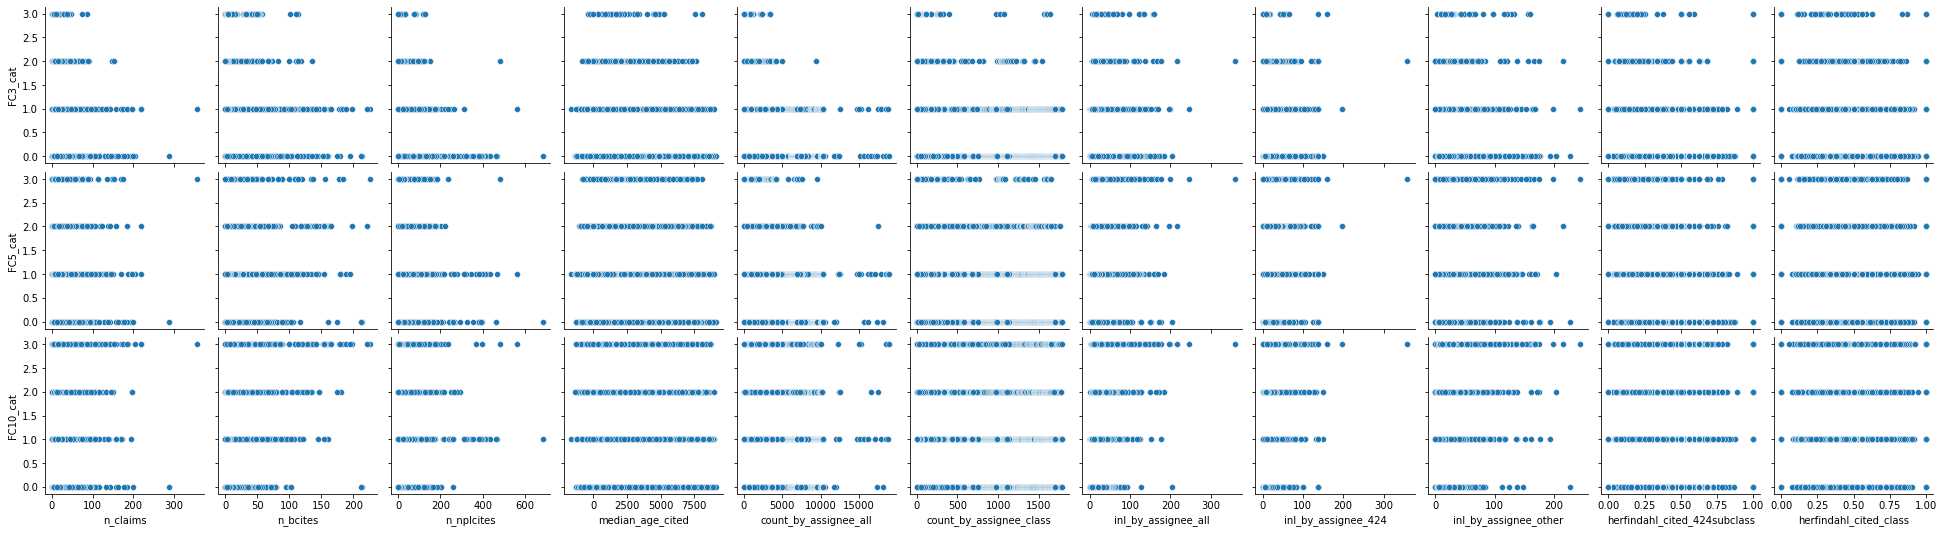

In [9]:
sns.pairplot(df_2class, y_vars = ["FC3_cat", "FC5_cat", "FC10_cat"], \
                     x_vars = l)

In [35]:
def norm_vars(variables):
    df_norms = pd.DataFrame()
    for var in variables:
        print(var)


        nbcites = np.array([])
        c = 0
        for year in range(1975, 2010):

            y = df_2class.loc[(df_2class["issuedate"] >= date(year, 1,1)) & (df_2class["issuedate"] < date(year + 1,1,1))][var].values

            c += y.shape[0]
#             print(year, y.shape, c)
            nbcites = np.concatenate([nbcites, y.mean() + (y - y.mean())/y.std()], axis = 0)

        df_norms[var] = nbcites
    

    return(df_norms)

In [36]:
l = ["n_claims", "n_bcites", "n_nplcites", "median_age_cited",\
                               "count_by_assignee_all","count_by_assignee_class",\
                               "inl_by_assignee_all", "inl_by_assignee_424", "inl_by_assignee_other"]
df_norms = norm_vars(l)

n_claims
n_bcites


<ipython-input-35-8f07582d04b6>:15: RuntimeWarning: Mean of empty slice.
  nbcites = np.concatenate([nbcites, y.mean() + (y - y.mean())/y.std()], axis = 0)
C:\Users\DIEGO UNZUETA\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\DIEGO UNZUETA\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\DIEGO UNZUETA\anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\DIEGO UNZUETA\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


n_nplcites
median_age_cited
count_by_assignee_all
count_by_assignee_class
inl_by_assignee_all
inl_by_assignee_424
inl_by_assignee_other


In [43]:
df_norms["FC3"] = df_2class["FC3"]
df_norms["FC5"] = df_2class["FC5"]
df_norms["FC10"] = df_2class["FC10"]

## The Dependent Variable: FC3

In [4]:
df_2class.columns

Index(['patent', 'st_country', 'assignee', 'class', 'subclass', 'issuedate',
       'nonutility', 'appnum', 'application_date', 'n_claims',
       'claims_info_missing', 'n_bcites', 'n_fcites', 'n_nplcites',
       'inlinks_all', 'inlinks_class', 'FC3', 'FC5', 'FC10', 'FC3_cat',
       'FC5_cat', 'FC10_cat', 'herfindahl_cited_class',
       'herfindahl_cited_424subclass', 'median_age_cited', 'median_date_cited',
       'asstype_1', 'asstype_2', 'asstype_3', 'asstype_4', 'asstype_5',
       'asstype_6', 'asstype_7', 'count_by_assignee_all',
       'count_by_assignee_class', 'inl_by_assignee_all', 'inl_by_assignee_424',
       'inl_by_assignee_other', 'FC3_cat_quartiles', 'FC5_cat_quartiles',
       'FC10_cat_quartiles', 'pagerank_order1', 'pagerank_order5',
       'pagerank_order2', 'pagerank_order3', 'pagerank_order4',
       'pagerank_order6', 'pagerank_order0', 'pagerank_order8',
       'pagerank_order7', 'sliding_window', 'pagerank_order9',
       'pagerank_order11', 'pagerank_order

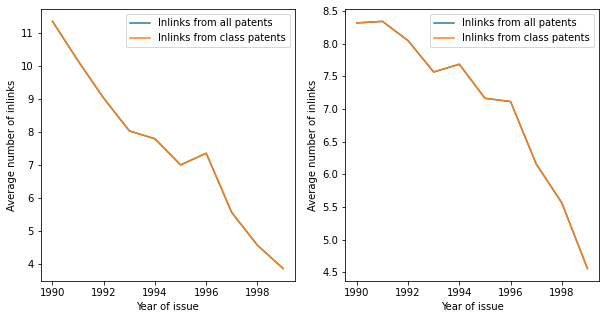

In [10]:
_, ax = plt.subplots(1,2, figsize = (10, 5))

col = ["inlinks_class", "inlinks_class"]
for index, dataset in enumerate([df_424, df_2class]):
    # plt.plot(df_424["n_fcites"].groupby( pd.to_datetime(df_424["issuedate"]).dt.year).mean(), )
    ax[index].plot(dataset["inlinks_class"].groupby( pd.to_datetime(dataset["issuedate"]).dt.year).mean(), label =  "Inlinks from all patents")
    ax[index].plot(dataset[col[index]].groupby( pd.to_datetime(dataset["issuedate"]).dt.year).mean(), label = "Inlinks from class patents")
    ax[index].legend()
    ax[index].set_xlabel("Year of issue")
    ax[index].set_ylabel("Average number of inlinks")

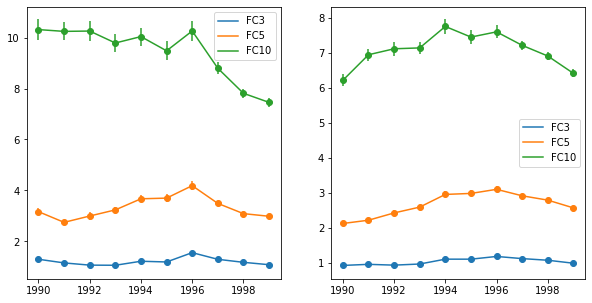

In [6]:
_, ax = plt.subplots(1,2, figsize = (10, 5))

col = ["inlinks_424", "inlinks_2class"]
for index, dataset in enumerate([df_424, df_2class]):

    
    fc3 = dataset["FC3"].groupby( pd.to_datetime(dataset["issuedate"]).dt.year)
    ax[index].plot(fc3.mean(), label = "FC3")
    ax[index].errorbar([i for i in range(1990, 2000)], fc3.mean(), yerr = fc3.std()/np.sqrt(fc3.count()),  fmt = "o", c = "C0")

    fc5 = dataset["FC5"].groupby( pd.to_datetime(dataset["issuedate"]).dt.year)
    ax[index].plot(fc5.mean(), label = "FC5")
    ax[index].errorbar([i for i in range(1990, 2000)], fc5.mean(), yerr = fc5.std()/np.sqrt(fc5.count()),  fmt = "o", c = "C1")

    fc10 = dataset["FC10"].groupby( pd.to_datetime(dataset["issuedate"]).dt.year)
    ax[index].plot(fc10.mean(), label = "FC10")
    ax[index].errorbar([i for i in range(1990, 2000)], fc10.mean(), yerr = fc10.std()/np.sqrt(fc10.count()),  fmt = "o", c = "C2")

    ax[index].legend()

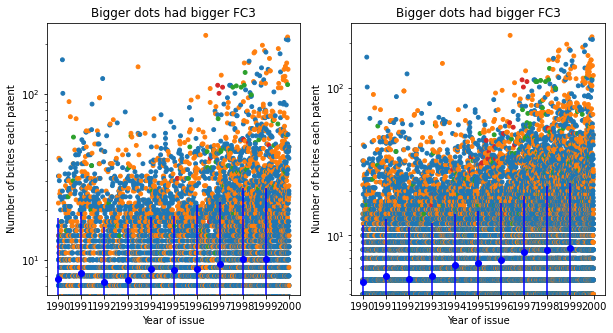

In [16]:
_, ax = plt.subplots(1,2, figsize = (10, 5))

col = ["inlinks_424", "inlinks_2class"]
for index, dataset in enumerate([df_424, df_2class]):


    colors = {0: "C0", 1: "C1", 2: "C2", 3: "C3"}
    ax[index].scatter(dataset["issuedate"], dataset["n_bcites"], c = dataset["FC3_cat"].map(colors), s = 15)
    bcites = dataset["n_bcites"].groupby(pd.to_datetime(dataset["issuedate"]).dt.year)

    ax[index].errorbar([date(i, 1,1) for i in range(1990, 2000)], bcites.mean(), yerr = bcites.std(), label = "FC3 - Class 424 (citations from 424 patents)", fmt = "o", c = "blue")

    ax[index].set_yscale("log")
    ax[index].set_xlabel("Year of issue")
    ax[index].set_ylabel("Number of bcites each patent")
    ax[index].set_title("Bigger dots had bigger FC3")

## Plotting Dependence on other variables

In [5]:
def plot_var(dataset, ax, var, l= ["FC3", "FC5", "FC10"], log = True, scatter = False, cat = False, sd_error = False, logx = True, bin_nums = 10):

    if cat == True:
        l = ["FC3_cat", "FC5_cat", "FC10_cat"]
    style = "-"
    
    for i, FC in enumerate(l):
 
        bins=np.logspace(0,np.log10(max(dataset[var])), bin_nums)
        if logx == False:
            bins=np.linspace(0,max(dataset[var]), bin_nums)
           
        index = np.digitize(dataset[var], bins= bins)
        group = dataset[FC].groupby(index)


        if len(group.mean()) != bin_nums+1:
            mean, std, count = np.zeros(bin_nums + 1), np.zeros(bin_nums+1), np.zeros(bin_nums+1)
            
            mean[group.mean().keys()] = group.mean()
            std[group.std().keys()] = group.std()
            count[group.count().keys()] = group.count()
            
            mean = mean[:-1]
            std = std[:-1]
            count = count[:-1]
        else:
            mean = group.mean()[:-1]
            std = group.std()[:-1]
            count = group.count()[:-1]
        
        error = std / np.sqrt(count-1)
        
        if sd_error == True:
            error = std
            
        ax.errorbar(bins[1:], mean[1:], yerr =  error[1:], fmt = "o", linestyle = style, label = FC, c = "C"+str(i) )

        if scatter  == True:
            ax.scatter(dataset[var], dataset[FC], alpha = 0.1)

    if log == True:
        ax.set_yscale("log")
    
    if logx == True:
        ax.set_xscale("log")
    ax.legend()


In [74]:
import matplotlib

<ipython-input-83-0bcc6cfa5bf8>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[col_n].set_xticklabels(r)
<ipython-input-83-0bcc6cfa5bf8>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[col_n].set_xticklabels(r)


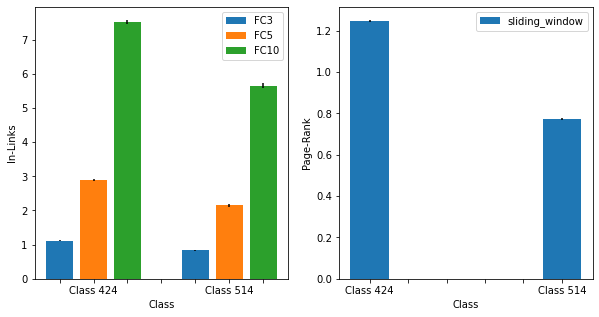

In [83]:
_, ax = plt.subplots(1,2, figsize = (10, 5))

dep = [["FC3", "FC5", "FC10"], ["sliding_window"]]
ylable = ["In-Links", "Page-Rank"]
for col_n, var in enumerate(dep):

    bins = np.linspace(0, max(df_2class["herfindahl_cited_class"]), 2)

    # bins=np.logspace(0,np.log10(max(df_424["herfindahl_cited_class"])), 10)
    index = np.digitize(df_2class["herfindahl_cited_class"], bins= bins)

    for i in range(len(var)):

        FC = var[i]
        group = df_2class[FC].groupby(index)
        # plt.plot(bins, group.mean(), c = "C1")

        ax[col_n].bar(bins+0.25*i,  group.mean(), width = 0.2, yerr =  group.std()/np.sqrt(group.count()) , label = FC, color = "C"+str(i) )
        ax[col_n].legend()
        ax[col_n].set_xlabel("Class")
        ax[col_n].set_ylabel(ylable[col_n])
    
    
    if col_n == 0:
        r = [""]*8
        r[2] = matplotlib.text.Text(0, 0, "Class 424")
        r[6] = matplotlib.text.Text(1, 0, "Class 514")
        ax[col_n].set_xticklabels(r)
    if col_n == 1:

        r = [""]*8
        r[1] = matplotlib.text.Text(0, 0, "Class 424")
        r[6] = matplotlib.text.Text(1, 0, "Class 514")
        ax[col_n].set_xticklabels(r)

    else:
         a = ax[col_n].get_yticklabels()
#         ax[col_n].set_xticks(["FC3", "FC5", "FC10", "FC3", "FC5", "FC10"])


In [98]:
g = df_2class.loc[df_2class["class_514"] == 0]["FC10"]
print(g.mean(), g.std(), g.count())
print(g.mean(), "+-", g.std()/np.sqrt(g.count() - 1))

9.016333523700743 12.231082032039202 17510
9.016333523700743 +- 0.09243452366914454


In [99]:
c = 0
for i in g:
    c +=(i-g.mean())**2

In [104]:
np.sqrt(c)/np.sqrt(g.count()-1)

12.231082032039202

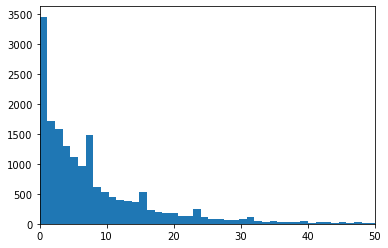

In [94]:
plt.hist(g, bins = 200)
plt.xlim(0, 50)
plt.show()


## Novelty

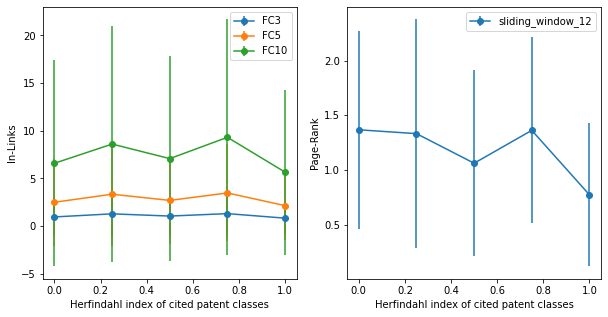

In [10]:
_, ax = plt.subplots(1,2, figsize = (10, 5))

dep = [["FC3", "FC5", "FC10"], ["sliding_window_12"]]
ylable = ["In-Links", "Page-Rank"]
for col_n, var in enumerate(dep):

    bins = np.linspace(0, max(df_2class["herfindahl_cited_class"]), 5)
    index = np.digitize(df_2class["herfindahl_cited_class"], bins= bins)

    for i in range(len(var)):

        FC = var[i]
        group = df_2class[FC].groupby(index)
        # plt.plot(bins, group.mean(), c = "C1")
        ax[col_n].errorbar(bins, group.mean(), yerr =  group.std() , fmt = "o", linestyle = "-", label = FC, c = "C"+str(i) )
        ax[col_n].legend()
        ax[col_n].set_xlabel("Herfindahl index of cited patent classes")
        ax[col_n].set_ylabel(ylable[col_n])

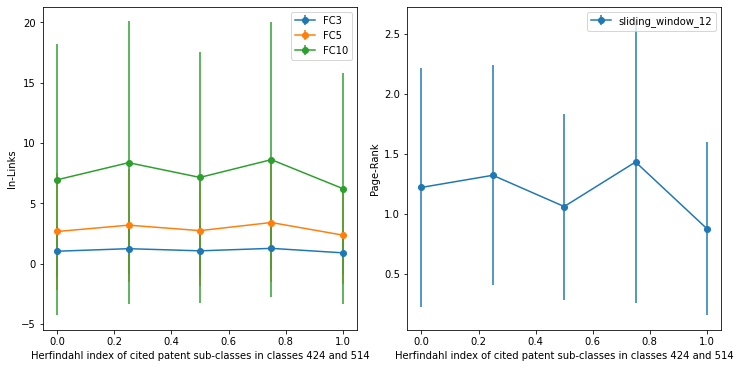

In [11]:

_, ax = plt.subplots(1,2, figsize = (10, 5),  constrained_layout = True)

dep = [["FC3", "FC5", "FC10"], ["sliding_window_12"]]
ylable = ["In-Links", "Page-Rank"]
for col_n, var in enumerate(dep):

    bins = np.linspace(0, max(df_2class["herfindahl_cited_424subclass"]), 5)

    # bins=np.logspace(0,np.log10(max(df_424["herfindahl_cited_class"])), 10)
    index = np.digitize(df_2class["herfindahl_cited_424subclass"], bins= bins)

    for i in range(len(var)):

        FC = var[i]
        group = df_2class[FC].groupby(index)
        # plt.plot(bins, group.mean(), c = "C1")
        ax[col_n].errorbar(bins, group.mean(), yerr =  group.std() , fmt = "o", linestyle = "-", label = FC, c = "C"+str(i) )
        ax[col_n].legend()
        ax[col_n].set_xlabel("Herfindahl index of cited patent sub-classes in classes 424 and 514")
        ax[col_n].set_ylabel(ylable[col_n])

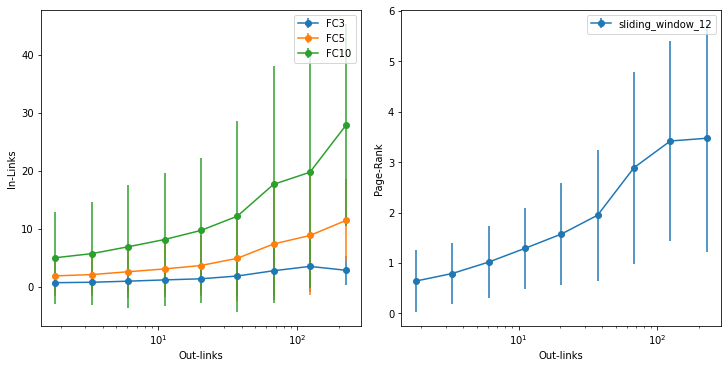

In [12]:


l = ["n_bcites"]
ylable = ["In-Links", "Page-Rank"]
dep = [["FC3", "FC5", "FC10"], ["sliding_window_12"]]

_, ax = plt.subplots(1, 2, figsize = (10, 5),constrained_layout=True)

# for j, dataset in enumerate([df_424, df_2class]):
for ind_var, var in enumerate(dep):
    for index, i in enumerate(l):
        plot_var(df_2class, ax[ind_var], i, l= var,  cat = False, log = False, sd_error = True, logx = True)

    ax[ind_var].set_ylabel(ylable[ind_var])
    ax[ind_var].set_xlabel("Out-links")

## Science Intensity, Growth speed, scope and convergence

In [13]:
df_2class[["n_nplcites", "median_age_cited", "n_claims"]].head()

,n_nplcites,median_age_cited,n_claims
0,8,2709.000000,46.0
1,0,1505.000000,1.0
2,0,896.000000,8.0
3,0,1358.000000,20.0
4,1,2079.248489,14.0


<ipython-input-5-6e319742f94e>:34: RuntimeWarning: invalid value encountered in sqrt
  error = std / np.sqrt(count-1)


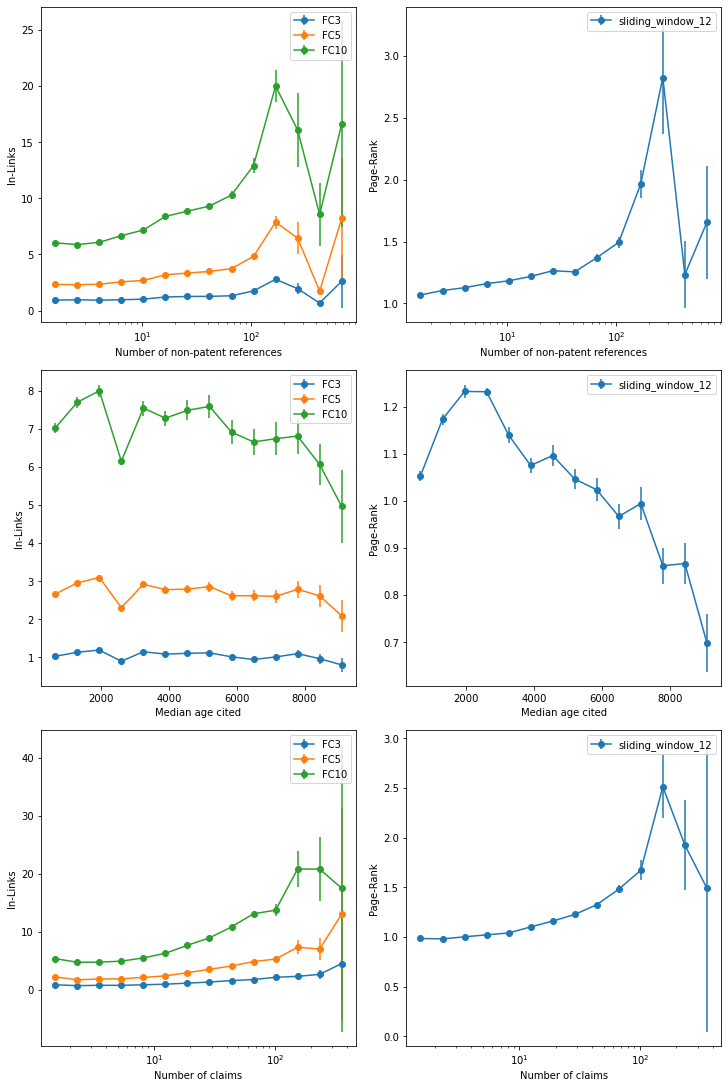

In [17]:
l = ["n_nplcites", "median_age_cited", "n_claims"]
xlable = ["Number of non-patent references", "Median age cited", "Number of claims"]
_, ax = plt.subplots(len(l), 2, figsize = (10, 15), constrained_layout = True)
log = [True, False, True]

for ind_var, var in enumerate(dep):
    for index, i in enumerate(l):
        plot_var(df_2class, ax[index, ind_var], i, bin_nums = 15, l= var,  cat = False, log = False, sd_error = False, logx = log[index])
    
        ax[index, ind_var].set_ylabel(ylable[ind_var])
        ax[index, ind_var].set_xlabel(xlable[index])
 

## Development effort and capabilities

<ipython-input-5-6e319742f94e>:34: RuntimeWarning: invalid value encountered in sqrt
  error = std / np.sqrt(count-1)


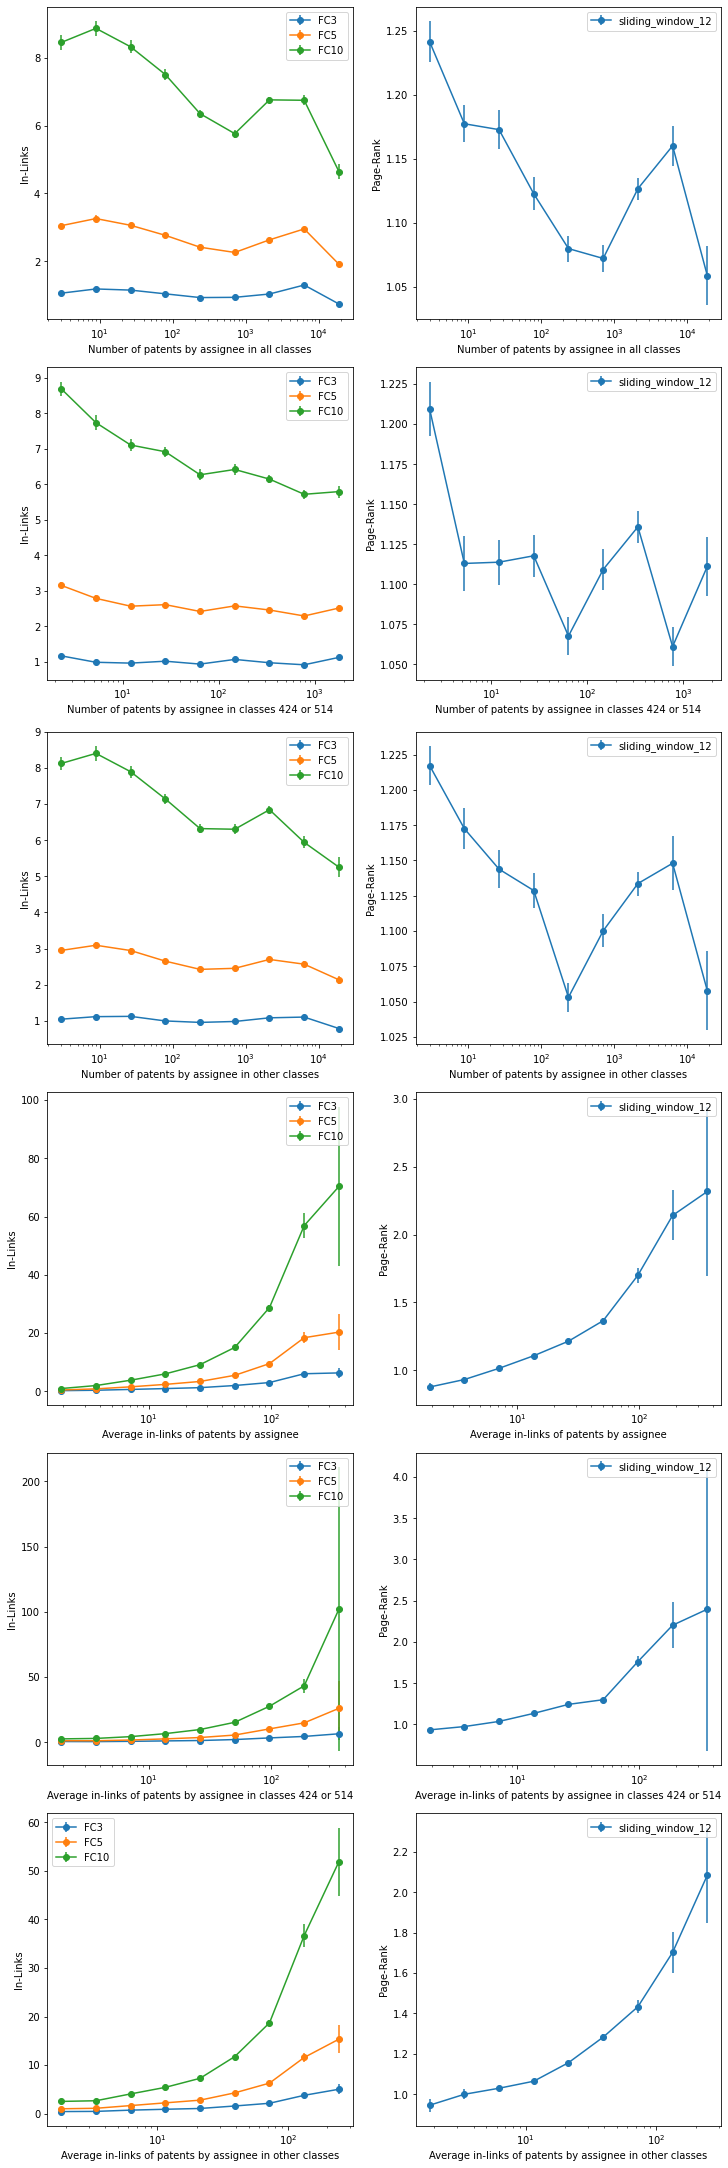

In [16]:
l = ["count_by_assignee_all", "count_by_assignee_class", "counts_by_assignee_other",\
     "inl_by_assignee_all", "inl_by_assignee_424", "inl_by_assignee_other" ]

xlable = ["Number of patents by assignee in all classes", "Number of patents by assignee in classes 424 or 514", "Number of patents by assignee in other classes",\
          "Average in-links of patents by assignee", "Average in-links of patents by assignee in classes 424 or 514", "Average in-links of patents by assignee in other classes"]
_, ax = plt.subplots(len(l), 2, figsize = (10, 30), constrained_layout = True)
log = [True]  * 6#[False] * 3 + [True] * 3

for ind_var, var in enumerate(dep):
    for index, i in enumerate(l):
        plot_var(df_2class, ax[index, ind_var], i, bin_nums = 10, l= var,  cat = False, log = False, sd_error = False, logx = log[index])
    
        ax[index, ind_var].set_ylabel(ylable[ind_var])
        ax[index, ind_var].set_xlabel(xlable[index])
 

## Correlations

In [17]:
df_2class.columns

Index(['patent', 'st_country', 'assignee', 'subclass', 'issuedate',
       'nonutility', 'appnum', 'application_date', 'n_claims',
       'claims_info_missing', 'n_bcites', 'n_fcites', 'n_nplcites',
       'inlinks_all', 'inlinks_class', 'FC3', 'FC5', 'FC10', 'FC3_cat',
       'FC5_cat', 'FC10_cat', 'herfindahl_cited_class',
       'herfindahl_cited_424subclass', 'median_age_cited', 'median_date_cited',
       'asstype_1', 'asstype_2', 'asstype_3', 'asstype_4', 'asstype_5',
       'asstype_6', 'asstype_7', 'count_by_assignee_all',
       'count_by_assignee_class', 'inl_by_assignee_all', 'inl_by_assignee_424',
       'inl_by_assignee_other', 'FC3_cat_quartiles', 'FC5_cat_quartiles',
       'FC10_cat_quartiles', 'pagerank_order1', 'pagerank_order5',
       'pagerank_order2', 'pagerank_order3', 'pagerank_order4',
       'pagerank_order6', 'pagerank_order0', 'pagerank_order8',
       'pagerank_order7', 'sliding_window', 'pagerank_order9',
       'pagerank_order11', 'pagerank_order12', 'pag

In [18]:
l = ["class_514","herfindahl_cited_class", "herfindahl_cited_424subclass", "n_nplcites", "median_age_cited", "n_claims",\
    "count_by_assignee_all", "count_by_assignee_class", "counts_by_assignee_other",\
     "inl_by_assignee_all", "inl_by_assignee_424", "inl_by_assignee_other", \
     
     'st_country_class_0', 'st_country_class_1', 'st_country_class_2',
     'subclass_class_0', 'subclass_class_1', 'subclass_class_2', 'subclass_class_3', \
     "outl_by_assignee_all", "outl_by_assignee_424", "outl_by_assignee_other",\
     "inl_by_cited_all", "oul_by_cited_all"]

In [19]:
df_corr = df_2class[l+['FC3', 'FC5', 'FC10', "sliding_window_12"]]

In [20]:
l_n =             ["Class",
                   "Herfindahl index of cited patent classes", 
                   "Herfindahl index of cited patent sub-classes",
                   "Number of non-patent references",
                   "Median age of patents cited",
                   "Number of claims",
                   "Number of patents by assignee",
                   "Number of patents by assignee in class 424 or 514",
                   "Number of patents by assignee in other classes",
                   "Average in-links of patents by assignee",
                   "Average in-links of patents by assignee in classes 424 or 514",
                   "Average in-links of patents by assignee in other classes",
                   
                   "Country Cluster 0",
                   "Country Cluster 1",
                   "Country Cluster 2",
                   

                   "Sub-class Cluster 0",
                   "Sub-class Cluster 1",
                   "Sub-class Cluster 2",
                   "Sub-class Cluster 3",
                   
                   "Average out-links of patents by assignee",
                   "Average out-links of patents by assignee in classes 424 or 514",
                   "Average out-links of patents by assignee in other classes",
                   "Average in-links by cited patents",
                   "Average out-links by cited patents",
                   "FC3", "FC5", "FC10", "Page-Rank Sliding Window"]

In [21]:
df_corr.columns = l_n

In [23]:
# df_424.corr()
d = df_corr.corr(method = "spearman")[['FC3', 'FC5', 'FC10', "Page-Rank Sliding Window"]].loc[l_n[:-4]].style.background_gradient(cmap='coolwarm')

In [24]:
import dataframe_image as dfi
 
dfi.export(d, 'dataframe.png')

,FC3,FC5,FC10,Page-Rank Sliding Window
Class,-0.106669,-0.168734,-0.211225,-0.028000
Herfindahl index of cited patent classes,-0.019042,-0.021764,-0.027368,-0.335999
Herfindahl index of cited patent sub-classes,0.021078,0.033816,0.036559,-0.123474
Number of non-patent references,0.050255,0.081538,0.116382,0.129799
Median age of patents cited,-0.001723,-0.003275,-0.006344,0.024475
Number of claims,0.140820,0.185471,0.204175,0.117349
Number of patents by assignee,-0.009778,-0.042467,-0.075966,-0.033285
Number of patents by assignee in class 424 or 514,-0.045621,-0.091804,-0.131632,-0.048392
Number of patents by assignee in other classes,-0.001489,-0.028338,-0.057799,-0.028936
Average in-links of patents by assignee,0.206640,0.296648,0.371989,0.145276


In [107]:
# df_424.corr()
df_2class.corr(method = "spearman")[['FC3_cat', 'FC5_cat', 'FC10_cat']].loc[l].style.background_gradient(cmap='coolwarm')

,FC3_cat,FC5_cat,FC10_cat
n_claims,0.127741,0.168809,0.191216
n_bcites,0.158767,0.192812,0.213433
n_nplcites,0.052614,0.073580,0.110306
median_age_cited,0.012591,0.010954,0.006830
count_by_assignee_all,-0.007086,-0.041977,-0.079794
count_by_assignee_class,-0.037036,-0.087945,-0.133155
inl_by_assignee_all,0.208322,0.293470,0.372098
inl_by_assignee_424,0.118158,0.167526,0.209574
inl_by_assignee_other,0.167023,0.231872,0.292704
herfindahl_cited_424subclass,0.013252,0.029583,0.032376


## Balance in categorical data

In [20]:
df_424[["FC3_cat", "FC5_cat", "FC10_cat"]].head()

,FC3_cat,FC5_cat,FC10_cat
0,0,1,3
1,0,1,1
2,0,0,1
3,1,2,3
4,0,0,0


In [67]:
cat_vals =  df_2class[["FC3_cat", "FC5_cat", "FC10_cat"]].values

In [68]:
cats = ["L"+ str(4-i) for i in range(4)]

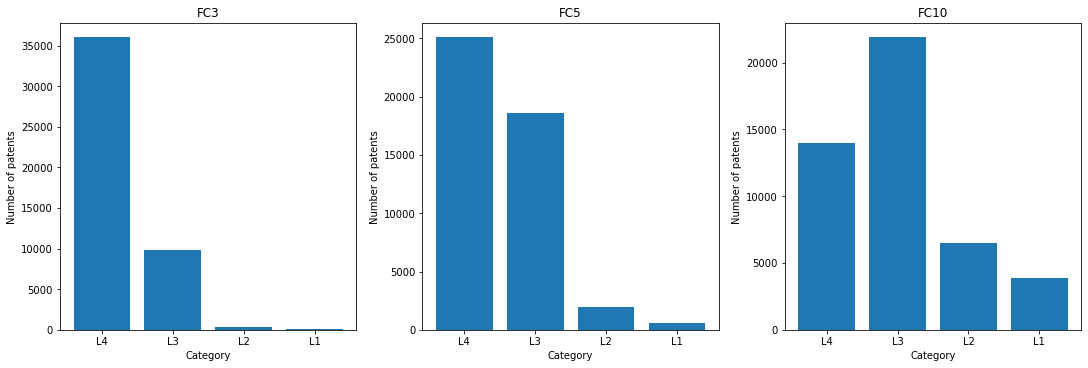

In [71]:
_, ax = plt.subplots(1, 3, figsize = (15, 5), constrained_layout=True)
n = ["FC3", "FC5", "FC10"]
for i in range(3):
    keys, amounts = np.unique(cat_vals[:, i], return_counts = True)
    ax[i].bar(cats, amounts)
    ax[i].set_xlabel("Category")
    ax[i].set_ylabel("Number of patents")
    ax[i].set_title(n[i])

## Percentiles

In [8]:
df_424[["FC3", "FC5", "FC10"]].describe()["FC3"].loc[["min", "25%", "50%", "75%"]].values

array([0., 0., 1., 2.])

In [37]:
def categorical_FC_quartiles(df):
    for index, FC in enumerate(["FC3", "FC5", "FC10"]):
        FC_cat = np.full(len(df), 3)
        FC_cat[((df[FC] > 0) & (df[FC] < 2)).values].shape

        caps = df[FC].describe().loc[["min", "25%", "50%", "75%"]].values  # [0,2,10,20]
        FC_cat = np.full(len(df), 3)
        print(caps)
        for i in range(len(caps)-1):
            FC_cat[((df[FC] >= caps[i]) & (df[FC] < caps[i+1])).values] = i

        df["{}_cat_quartiles".format(FC)] = FC_cat
    return(df)

In [38]:
df_424 = categorical_FC_quartiles(df_424)

[0. 0. 1. 2.]
[0. 1. 2. 4.]
[ 0.  2.  5. 11.]


In [39]:
df_2class = categorical_FC_quartiles(df_2class)

[0. 0. 0. 1.]
[0. 0. 1. 3.]
[0. 1. 3. 9.]


In [51]:
cat_vals =  df_424[["FC3_cat_quartiles", "FC5_cat_quartiles", "FC10_cat_quartiles"]].values

In [53]:
cats = [["L1 + L2", "L3", "L4"],
        ["L"+ str(4-i) for i in range(4)],
        ["L"+ str(4-i) for i in range(4)]]

[1 2 3]
[0 1 2 3]
[0 1 2 3]


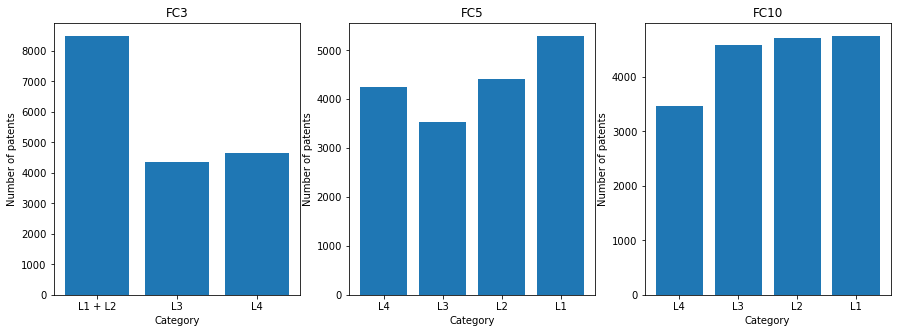

In [54]:
_, ax = plt.subplots(1, 3, figsize = (15, 5))
n = ["FC3", "FC5", "FC10"]
for i in range(3):
    keys, amounts = np.unique(cat_vals[:, i], return_counts = True)

    print(keys)
    ax[i].bar(cats[i], amounts)
    ax[i].set_xlabel("Category")
    ax[i].set_ylabel("Number of patents")
    ax[i].set_title(n[i])

In [55]:
cat_vals =  df_2class[["FC3_cat_quartiles", "FC5_cat_quartiles", "FC10_cat_quartiles"]].values

In [57]:
cats = [["L1 + L2 + L3", "L4"],
        ["L1 + L2","L3", "L4"],
        ["L"+ str(4-i) for i in range(4)]]

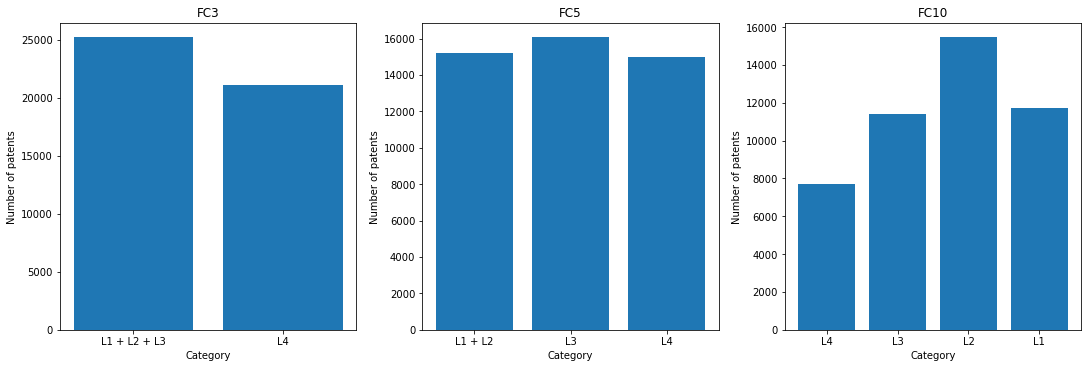

In [66]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5),constrained_layout=True)
# fig.tight_layout() 
n = ["FC3", "FC5", "FC10"]
for i in range(3):
    keys, amounts = np.unique(cat_vals[:, i], return_counts = True)
    ax[i].bar(cats[i], amounts)
    ax[i].set_xlabel("Category")
    ax[i].set_ylabel("Number of patents")
    ax[i].set_title(n[i])
